# DSC 530 Weeks 7 & 8 Coding Assignment
**Data Visualization and Plotting**

Dong Woon Kim

**Assignment Instructions**:  

In this assignment, you will learn how to create, customize, and enhance data visualizations using Python’s powerful plotting libraries, including Pandas, Matplotlib, and Seaborn. You will begin by exploring the fundamentals of visualization with Pandas and Matplotlib, gaining practical experience in generating various types of plots.
  
- [x] Setup your assignment notebook with access to the Chapter 5 and Chapter 6 data files from Hands-On Data Analysis with Pandas (Molin, 2021) and use Jupyter Lab/Notebook to complete the following problems:
- [x] **Chapter 5** Exercises 1-4
- [x] **Chapter 6** Exercises 1-2


**pandas `plot()` params**:
```
kind
x/y
subplots
layout
figsize
title
legend
style
color
colormap
logx/logy/loglog
xticks/yticks
xlim/ylim
rot
sharex/sharey
fontsize
grid
```

In [51]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import scipy

mplt_list = list(mplt.rcParams.keys())
sorted(mplt_list)



['_internal.classic_mode',
 'agg.path.chunksize',
 'animation.bitrate',
 'animation.codec',
 'animation.convert_args',
 'animation.convert_path',
 'animation.embed_limit',
 'animation.ffmpeg_args',
 'animation.ffmpeg_path',
 'animation.frame_format',
 'animation.html',
 'animation.writer',
 'axes.autolimit_mode',
 'axes.axisbelow',
 'axes.edgecolor',
 'axes.facecolor',
 'axes.formatter.limits',
 'axes.formatter.min_exponent',
 'axes.formatter.offset_threshold',
 'axes.formatter.use_locale',
 'axes.formatter.use_mathtext',
 'axes.formatter.useoffset',
 'axes.grid',
 'axes.grid.axis',
 'axes.grid.which',
 'axes.labelcolor',
 'axes.labelpad',
 'axes.labelsize',
 'axes.labelweight',
 'axes.linewidth',
 'axes.prop_cycle',
 'axes.spines.bottom',
 'axes.spines.left',
 'axes.spines.right',
 'axes.spines.top',
 'axes.titlecolor',
 'axes.titlelocation',
 'axes.titlepad',
 'axes.titlesize',
 'axes.titleweight',
 'axes.titley',
 'axes.unicode_minus',
 'axes.xmargin',
 'axes.ymargin',
 'axes.zmargi

## Chapter 5 from Hands-On Data Analysis with Pandas (Molin, 2021)

Create the following visualizations using what you have learned up to this point in this book. Use the data from this chapter's data/ directory:

### Exercise 1.

Plot the rolling 20-day minimum of the Facebook closing price using pandas.



Axes(0.125,0.2;0.775x0.68)


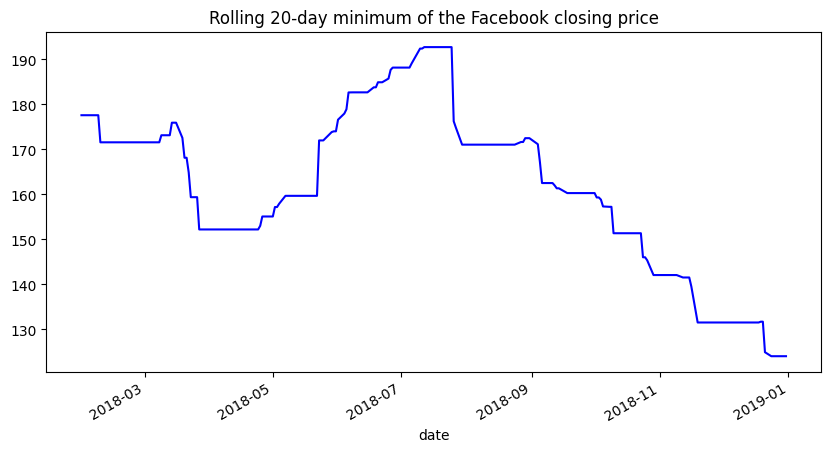

In [97]:
earthquakes = pd.read_csv(
    'data/earthquakes.csv',
    index_col = False
)

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv',
    index_col = 'date',
    parse_dates = True
)

fb_rolling = fb['close'].rolling(window = 20).min()

plot = fb_rolling.plot(
        kind = 'line',
        y = 'close',
        figsize = (10, 5),
        style = 'b-',
        legend = False,
        title = 'Rolling 20-day minimum of the Facebook closing price'
)

print(plot)

### Exercise 2.

Create a histogram and KDE of the change from open to close in the price of Facebook stock.



Text(0.5, 0, 'Price ($)')

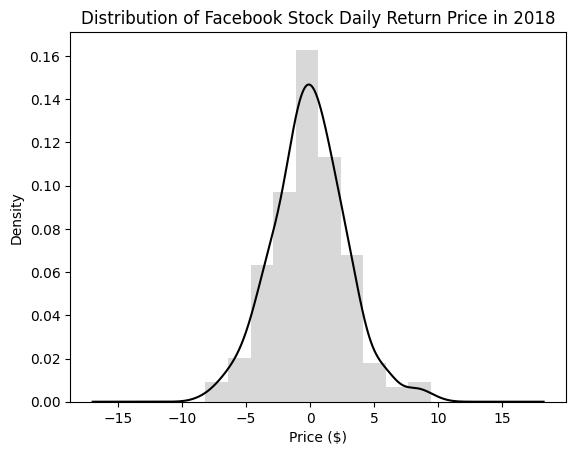

In [63]:
fb['change'] = fb['open'] - fb['close']
fb_change = pd.DataFrame(fb['change'])

ax = fb_change.plot(
    kind = 'hist',
    color = 'gray',
    legend = False,
    density = True,
    alpha = 0.3
)

fb_change.plot(
    ax = ax,
    kind = 'kde',
    color = 'black',
    legend = False,
    title = 'Distribution of Facebook Stock Daily Return Price in 2018'
)
plt.xlabel('Price ($)')


### Exercise 3.

Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.



0    5.7
Name: mag, dtype: float64

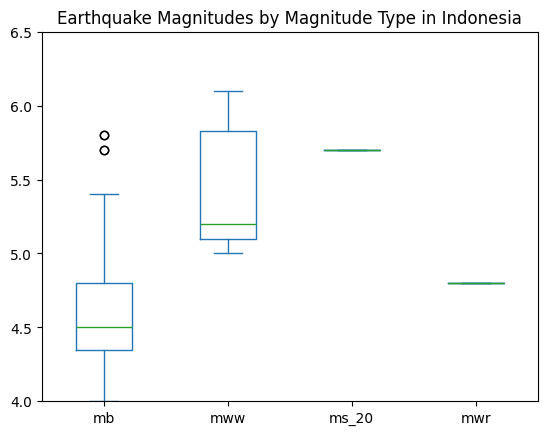

In [164]:
df = earthquakes
df = df[df['parsed_place'] == 'Indonesia']
df.head()

mb = df.loc[df['magType'] == 'mb', 'mag'].reset_index(drop = True)
mww = df.loc[df['magType'] == 'mww', 'mag'].reset_index(drop = True)
ms_20 = df.loc[df['magType'] == 'ms_20', 'mag'].reset_index(drop = True)
mwr = df.loc[df['magType'] == 'mwr', 'mag'].reset_index(drop = True)

df = pd.concat([mb, mww, ms_20, mwr], axis = 1)
df.columns = ['mb','mww','ms_20','mwr']
df.head()

df.iloc[:,:4].plot(
    kind = 'box',
    title = 'Earthquake Magnitudes by Magnitude Type in Indonesia'
)
plt.ylabel = 'Magnitude'
plt.xlabel = ['mb','mww','ms_20','mwr']
plt.ylim(4.0,6.5)

### Exercise 4.

Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.



<Axes: title={'center': 'Weekly Return for Facebook Stock'}, xlabel='date'>

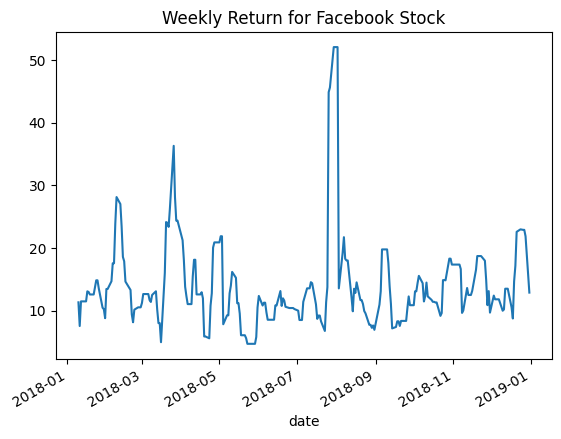

In [187]:
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv',
    index_col = 'date',
    parse_dates = True
)
high = fb['high'].rolling(window = 7).max()
low = fb['low'].rolling(window = 7).min()
df = high - low
df.plot(
    kind = 'line',
    title = 'Weekly Return for Facebook Stock'
)

## Chapter 6 from Hands-On Data Analysis with Pandas (Molin, 2021)

Create the following visualizations using what we have learned so far in this book and the data from this chapter. Be sure to add titles, axis labels, and legends (where appropriate) to the plots:

### Exercise 1.

Using Seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami for earthquakes measured with the mb magnitude type.


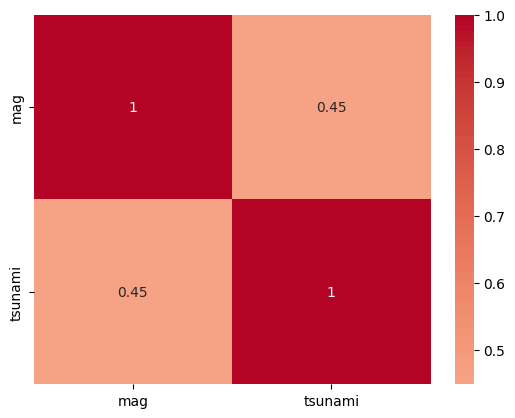

,mag,tsunami
mag,1.000000,0.448921
tsunami,0.448921,1.000000


In [194]:
import seaborn as sns

mb = earthquakes[earthquakes['magType'] == 'mb']
sns.heatmap(
    mb[['mag', 'tsunami']].corr(),
    annot = True,
    center = 0,
    cmap = 'coolwarm'
)
plt.show()

mb[['mag', 'tsunami']].corr()


### Exercise 2.

Create a box plot of Facebook volume traded and closing prices and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 − 1.5 × IQR and Q3 + 1.5 × IQR. Be sure to use the quantile() method on the data to make this easier. Pick whichever orientation you prefer for the plot, but make sure to use subplots.



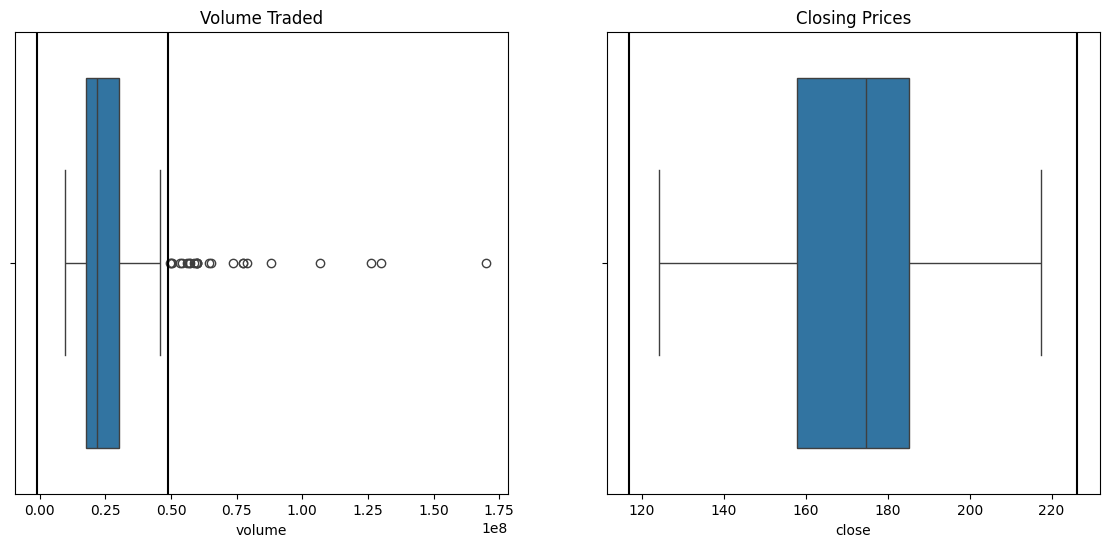

In [234]:
fb.head()
volume = fb['volume']
close = fb['close']

volume_iqr = volume.quantile(0.75) - volume.quantile(0.25)
volume_lower = volume.quantile(0.25) - 1.5 * volume_iqr
volume_upper = volume.quantile(0.75) + 1.5 * volume_iqr

close_iqr = close.quantile(0.75) -fb.close.quantile(0.25)
close_lower = close.quantile(0.25) - 1.5 * close_iqr
close_upper = close.quantile(0.75) + 1.5 * close_iqr

fig, axes = plt.subplots(1, 2, figsize = (14, 6))

sns.boxplot(x = fb['volume'], ax = axes[0], legend = False)
axes[0].axvline(volume_lower, color = 'black', label = 'Lower')
axes[0].axvline(volume_upper, color = 'black', label = 'Upper')
axes[0].set_title('Volume Traded')
    
sns.boxplot(x = fb['close'], ax = axes[1], legend = False)
axes[1].axvline(close_lower, color = 'black', label = 'Lower')
axes[1].axvline(close_upper, color = 'black', label = 'Upper')
axes[1].set_title('Closing Prices')

plt.show()